In [ ]:
# !pip install web3

In [ ]:
# The code here requires additional packages and libraries.
# !pip install "web3[tester]"
# error: Microsoft Visual C++ 14.0 or greater is required. Get it with "Microsoft C++ Build Tools": https://visualstudio.microsoft.com/visual-cpp-build-tools/

# from web3 import Web3, EthereumTesterProvider
# w3 = Web3(EthereumTesterProvider())
# w3.is_connected()

In [1]:
from web3 import Web3, AsyncWeb3

In [2]:
from dotenv import dotenv_values
config = dotenv_values("../.env")

In [3]:
url = config['INFURA_MAINNET'] + config['INFURA_KEY']

In [4]:
w3 = Web3(Web3.HTTPProvider(url))
w3.is_connected()

True

In [5]:
res = w3.eth.get_block('latest')
res

AttributeDict({'baseFeePerGas': 30607533175,
 'difficulty': 0,
 'extraData': HexBytes('0x6265617665726275696c642e6f7267'),
 'gasLimit': 29999972,
 'gasUsed': 20403787,
 'hash': HexBytes('0x171fa1d88472baeeb7ea13dad68f69655012786efb03bc43c5ee61cf8fa896ec'),
 'logsBloom': HexBytes('0x87b764f773b274bc0951a0268125def77a31a88843ad8a324ebb2146fe32201441d1002b943b2293460208604b154d883eb9232088d2b108a81a72b97579b711c44375b84c6ef02b7d65400f0e501f28adf91f6100cc1aae032080d29b79d152316900ecff7a38954cbabd698c8d1a9466ba1dec701b17eeb609673e800b409c4226804d4a0448d825e8ed2f97f8d407bdaa5e910f91065f160321610f77048d1ff30b731c8860eb7a0980b694943592463f46290708d80849e020ea06b82a19b3a078325620234124ca62041832bfa160e646917ca849546add9a329008f468d21cbb4041613d6782c758416831280a8d949958eb9ca358c40bd868a3698c77'),
 'miner': '0x95222290DD7278Aa3Ddd389Cc1E1d165CC4BAfe5',
 'mixHash': HexBytes('0xeda81f1ab270664a696b0a3eca0f8cb5e6fb1d1109a3b6bcf82f905dfebd91c8'),
 'nonce': HexBytes('0x0000000000000000'),
 'number': 

In [26]:
last_block_num = res.number
last_block_num

18219096

In [12]:
tx_id = res.transactions[0]
tx_id

HexBytes('0x52ee5b47d7e9d8da6bc4c862b6f6a5dc62c8c714f59b5ac9613231019773178a')

In [14]:
tx = w3.eth.get_transaction(tx_id)
tx

AttributeDict({'accessList': [AttributeDict({'address': '0x9ca78187e5536ba625e5f1ddc51cc0373e1f302c',
   'storageKeys': ['0x455d9eab2ba4bccb352d4340457c3c7ad82e1b7e6b5b19f240bd53a8f610effd',
    '0x000000000000000000000000000000000000000000000000000000000000000f',
    '0x0000000000000000000000000000000000000000000000000000000000000010',
    '0xa0b7a198dde78314cf78042b82e8b1ebbb528de3b4d92ac8012d2ae4c1034c40',
    '0x0000000000000000000000000000000000000000000000000000000000000000',
    '0x0000000000000000000000000000000000000000000000000000000000000013',
    '0x9c624a5d083d18dacebe46f8d8d787009a1c3414eac150bbec20649cf01d77e2',
    '0x192a790abf8ac3f5cc0ae1f39c494af987d583ad9b878306330a52fadefe144f',
    '0x000000000000000000000000000000000000000000000000000000000000000b',
    '0x000000000000000000000000000000000000000000000000000000000000000e',
    '0x0000000000000000000000000000000000000000000000000000000000000009',
    '0x00000000000000000000000000000000000000000000000000000000000000

In [16]:
tx['from']

'0x77ad3a15b78101883AF36aD4A875e17c86AC65d1'

In [17]:
tx['to']

'0x00000000A991C429eE2Ec6df19d40fe0c80088B8'

In [18]:
tx['value']

100168894

In [22]:
w3.from_wei(tx['value'], 'ether')

Decimal('1.00168894E-10')

In [38]:
limit = 3
txs = []
# last_block_num = X
for idx in range(limit):
    block_num = last_block_num - idx
    res = w3.eth.get_block(block_num)
    for idx2, tx_hash in enumerate(res.transactions):
        tx_details = w3.eth.get_transaction(tx_hash)
        txs.append([
            tx_details['from'],
            tx_details['to'],
            tx_details['value']
        ])


In [31]:
len(txs)

1755

In [39]:
txs[0]

['0x77ad3a15b78101883AF36aD4A875e17c86AC65d1',
 '0x00000000A991C429eE2Ec6df19d40fe0c80088B8',
 100168894]

#### Task

1) Create a network from the data collected.
2) Compute simple network statistics.
3) Plot it, coloring node by a centrality measure of your choice.



In [45]:
import pandas as pd
import numpy as np

df = pd.DataFrame(txs, columns = ['source', 'target', 'weight'])


In [49]:
import networkx as nx

G = nx.from_pandas_edgelist(df, 'source', 'target', 'weight')

In [50]:
G.number_of_edges()

528

In [51]:
G.number_of_nodes()


683

In [55]:
nx.number_connected_components(G)

158

In [58]:
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G0 = G.subgraph(Gcc[0])

In [59]:
G0.number_of_edges(), G0.number_of_nodes()

(235, 234)

In [60]:
nx.diameter(G0)

9

In [95]:
C = nx.clustering(G)

In [102]:
D = nx.degree(G)


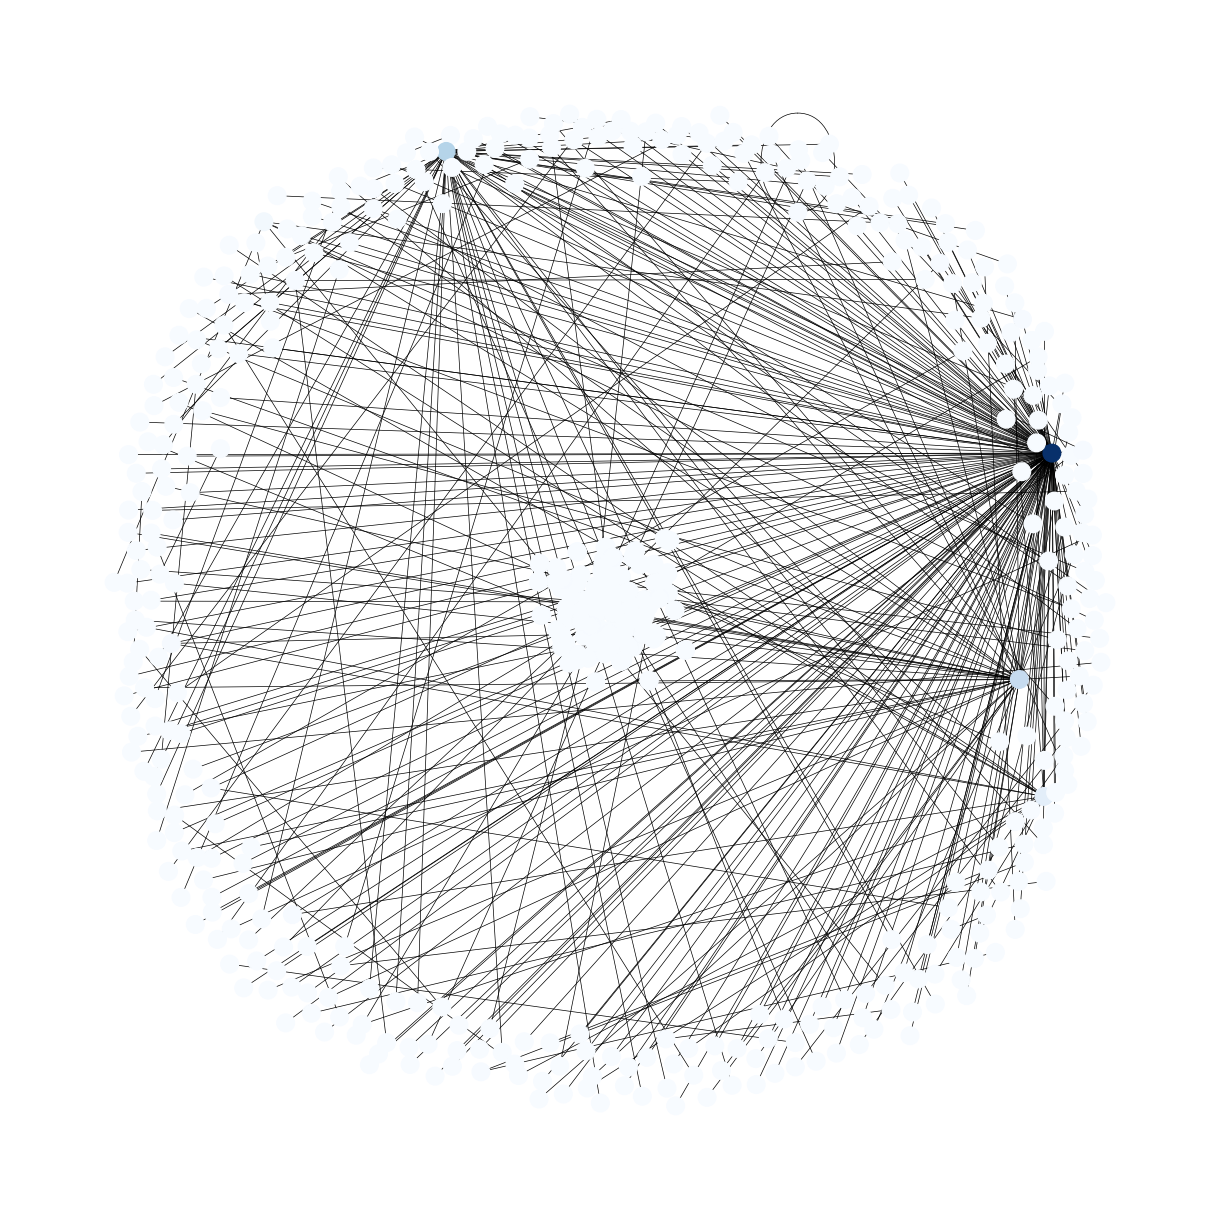

In [108]:
import matplotlib.pyplot as plt

options = {
    'node_size': 160,
    'width': 0.5,
    # 'node_color': list(C.values()),    # centrality values are mapped to color values
    'node_color': list(dict(D).values()),    # centrality values are mapped to color values
    'cmap': plt.cm.Blues
}

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, seed = 4711)

nx.draw(G, pos, **options)